In [ ]:
# use Google Colab for check code

In [3]:
# this code needs to be run to open the packages

# tidyverse includes dpylr which includes all the functions such as mutate, select, summarise etc
library("tidyverse")

# ggplot2 contains all the visualisation tools (similar to matplotlib)
library("ggplot2")

# fastdummies is for dummy coding
library("fastDummies")

# displaying in real numbers

options(scipen = 999)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.



In [2]:
# this code needs to be run once to install the packages on your system
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("fastDummies")
install.packages("dplyr")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Purpose of this worksheet
---

### In this worksheet you will start by using R versions of operations you have already used in Python.  Then you will be analysing student performance data and performing a multiple linear regression. ###

url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/exams.csv"



## Exercise 1
---

Read the data into a variable and have a look at it.

In [1]:
# Load the readr package
library(readr)

# Define the URL
url <- "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"

# Read the data from the URL
data <- read_csv(url)

# Look at the first few rows of the dataset
head(data)

# Get a summary of the data
summary(data)


ERROR: Error: package or namespace load failed for 'readr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'hms'


# Lets have a look at the data ###

We can use the `arrange()` function to sort the data or `desc()` function to sort into descending order



### Exercise 2 ###
---

Now have a go looking at the data in different ways, using the functions above:

In [ ]:
# Load the necessary libraries
library(dplyr)
library(readr)

# Define the URL for the dataset
url <- "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"

# Read the data from the URL
data <- read_csv(url)

# Print the column names to check the available columns
print("Column names in the dataset:")
print(colnames(data))

# Define the column names to use
column_name <- "math_score"  # Replace with an actual column name from your dataset
column_1 <- "gender"  # Replace with an actual column name from your dataset
column_2 <- "math_score"  # Replace with an actual column name from your dataset

# Sort the data by the specified column in ascending order
arranged_column <- arrange(data, .data[[column_name]])
print("Sorted by math_score in ascending order (first few rows):")
print(head(arranged_column))
print("Sorted by math_score in ascending order (last few rows):")
print(tail(arranged_column))
print("Summary of sorted data by math_score:")
print(summary(arranged_column))

# Sort the data by the specified column in descending order
arranged_column_desc <- arrange(data, desc(.data[[column_name]]))
print("Sorted by math_score in descending order (first few rows):")
print(head(arranged_column_desc))
print("Sorted by math_score in descending order (last few rows):")
print(tail(arranged_column_desc))
print("Summary of sorted data by math_score (descending):")
print(summary(arranged_column_desc))

# Select specific columns from the data
column_specific <- select(data, all_of(c(column_1, column_2)))
print("Selected columns gender and math_score:")
print(column_specific)



Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, ethnicity, parental_education, lunch, preparation_course
dbl (3): math_score, reading_score, writing_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Column names in the dataset:"
[1] "gender"             "ethnicity"          "parental_education"
[4] "lunch"              "preparation_course" "math_score"        
[7] "reading_score"      "writing_score"     
[1] "Sorted by math_score in ascending order (first few rows):"
# A tibble: 6 × 8
  gender ethnicity parental_education lunch        preparation_course math_score
  <chr>  <chr>     <chr>              <chr>        <chr>                   <dbl>
1 male   group C   high school        free/reduced none                       13
2 female group D   high school        standard     none                       18
3 male   group C   high school        free/reduced none                       21
4 male   group A   some high school   free/reduced none                       23
5 female group C   master's degree    free/reduced none                       27
6 female group B   associate's degree standard     completed                  28
# ℹ 2 more variables: reading_score <dbl>, writing_scor

# Prepare the data for a linear regression

Rows containing null, or error-prone values can affect statistics such as measures of central tendency (e.g. mean, median) and operations such as linear regressions, reducing accuracy.


### Exercise 3
---

Check your dataframe for null values and remove rows with null values if necessary

In [ ]:
# Load necessary libraries
library(dplyr)
library(readr)

# Define the URL for the dataset
url <- "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"

# Read the data from the URL
data <- read_csv(url)

# Check for null (missing) values in the dataset
print("Checking for null values:")
null_check <- is.na(data)
print(null_check)

# Count the number of missing values in each column
missing_values_count <- colSums(null_check)
print("Number of missing values in each column:")
print(missing_values_count)

# Remove rows with any null (missing) values
clean_data <- na.omit(data)

# Verify that there are no more null values in the cleaned data
print("Checking for null values after removing missing data:")
print(is.na(clean_data))

# Summary of the cleaned data
print("Summary of the cleaned data:")
print(summary(clean_data))

# Print the number of rows removed
rows_removed <- nrow(data) - nrow(clean_data)
print(paste("Number of rows removed:", rows_removed))


Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, ethnicity, parental_education, lunch, preparation_course
dbl (3): math_score, reading_score, writing_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Checking for null values:"
        gender ethnicity parental_education lunch preparation_course math_score
   [1,]  FALSE     FALSE              FALSE FALSE              FALSE      FALSE
   [2,]  FALSE     FALSE              FALSE FALSE              FALSE      FALSE
   [3,]  FALSE     FALSE              FALSE FALSE              FALSE      FALSE
   [4,]  FALSE     FALSE              FALSE FALSE              FALSE      FALSE
   [5,]  FALSE     FALSE              FALSE FALSE              FALSE      FALSE
   [6,]  FALSE     FALSE              FALSE FALSE              FALSE      FALSE
   [7,]  FALSE     FALSE              FALSE FALSE              FALSE      FALSE
   [8,]  FALSE     FALSE              FALSE FALSE              FALSE      FALSE
   [9,]  FALSE     FALSE              FALSE FALSE              FALSE      FALSE
  [10,]  FALSE     FALSE              FALSE FALSE              FALSE      FALSE
  [11,]  FALSE     FALSE              FALSE FALSE              FALSE      FALSE
  [12,] 

### Visualise data distribution ###
---

In statistics, when you are preparing data for analysis, you must first check if your data is Gaussian or not (normally distributed).

If data is normally distributed, it will have a bell curve and the spread of the data will tend to be small, with the mean centred in the data.

The types of statistical test that are meaningful for the data depend on whether or not your data is normally distributed.

To check for normality, lets first look at a histogram:

**Using the ggplot2 package (similar to pythons Matplotlib):**



### Exercise 4 ###
---

Create histograms to check the distribution of each numeric column in your data (writing_score, reading_score, math_score)

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, ethnicity, parental_education, lunch, preparation_course
dbl (3): math_score, reading_score, writing_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Number of missing values: 0"


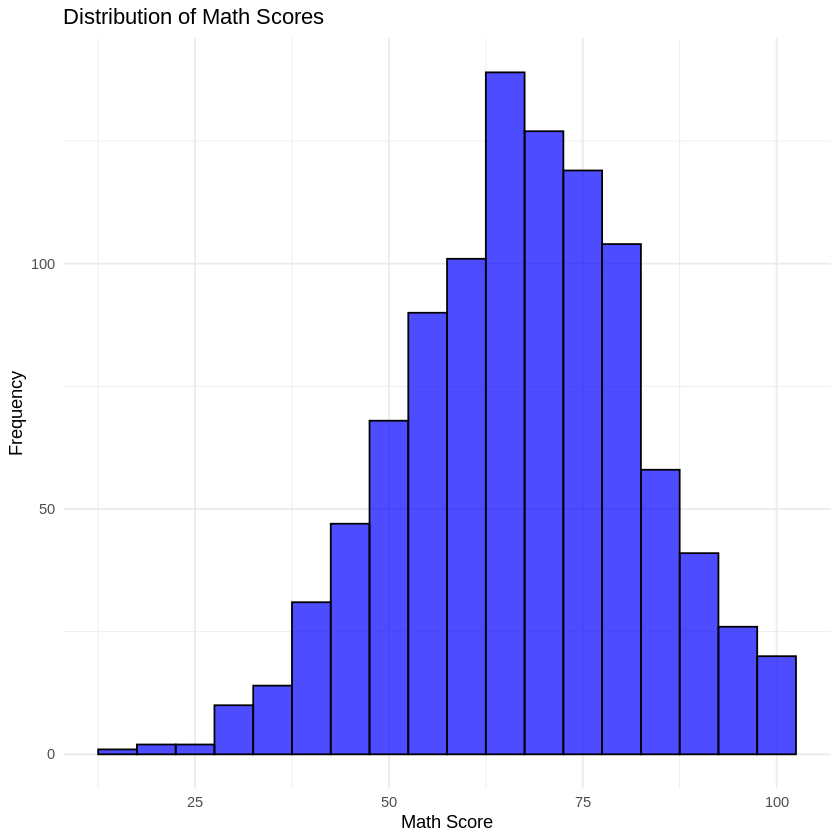

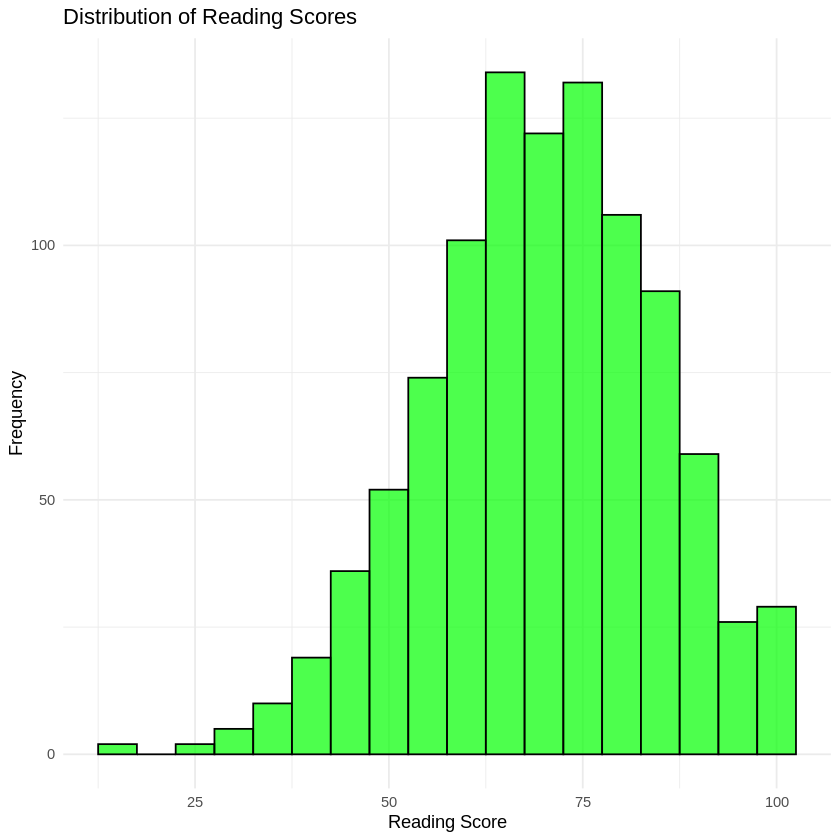

[1] "Histograms saved and displayed successfully!"


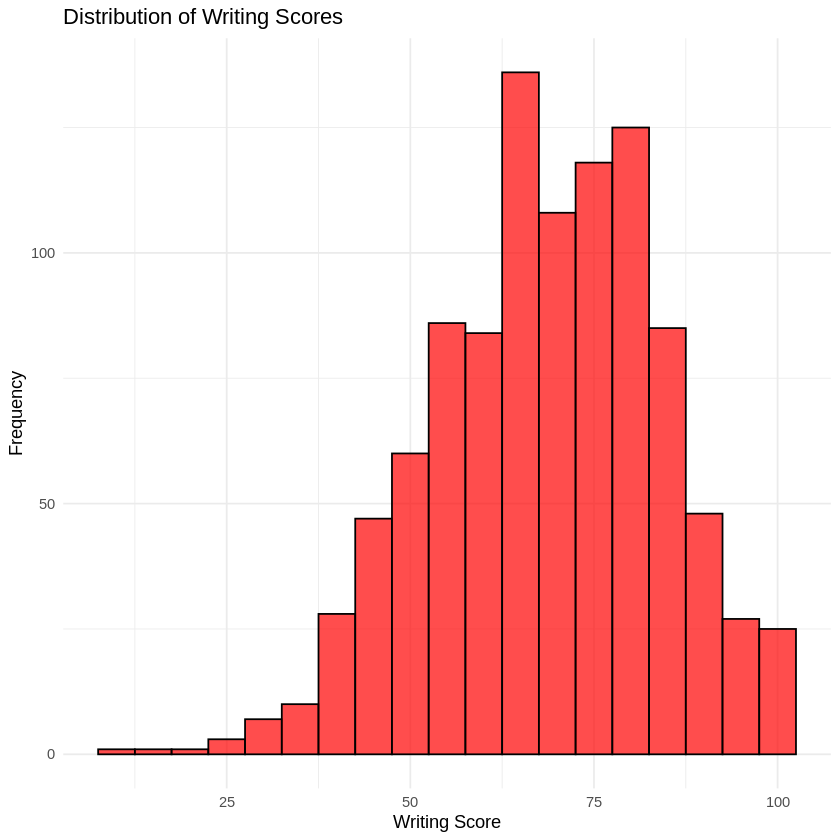

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr)

# Define the URL for the dataset
url <- "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"

# Read the data from the URL
data <- read_csv(url)

# Check for missing values
missing_values <- sum(is.na(data))
print(paste("Number of missing values:", missing_values))

# Remove rows with any null (missing) values
clean_data <- na.omit(data)

# Create and display histograms for each numeric column

# Histogram for math_score
math_plot <- ggplot(clean_data, aes(x = math_score)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Math Scores", x = "Math Score", y = "Frequency") +
  theme_minimal()

# Display the math_score histogram
print(math_plot)

# Save the math_score histogram
ggsave(filename = "math_score_histogram.png", plot = math_plot, width = 8, height = 6)

# Histogram for reading_score
reading_plot <- ggplot(clean_data, aes(x = reading_score)) +
  geom_histogram(binwidth = 5, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Reading Scores", x = "Reading Score", y = "Frequency") +
  theme_minimal()

# Display the reading_score histogram
print(reading_plot)

# Save the reading_score histogram
ggsave(filename = "reading_score_histogram.png", plot = reading_plot, width = 8, height = 6)

# Histogram for writing_score
writing_plot <- ggplot(clean_data, aes(x = writing_score)) +
  geom_histogram(binwidth = 5, fill = "red", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Writing Scores", x = "Writing Score", y = "Frequency") +
  theme_minimal()

# Display the writing_score histogram
print(writing_plot)

# Save the writing_score histogram
ggsave(filename = "writing_score_histogram.png", plot = writing_plot, width = 8, height = 6)

# Print completion message
print("Histograms saved and displayed successfully!")


## What about data that isn't numeric?
---

A linear regression is essentially a mathematical formula, which finds 2 terms (the slope and intercept) and can use that to predict new values.

Obviously you cannot do any calculations on words (such as male or female). Therefore, we need to 'dummy code' categorical values such as sex.

When R does the mathematical equation for the regression, we do not want the new dummy codes to interfere with the calculation, to get around that, we code the data using 0 and 1.

**There are many ways to dummy code your data, but to make things easy we are going to use a package!**


### Exercise 5 ###
---

Dummy code the categorical columns, removing the first dummy and the original columns.

In [ ]:
# Load necessary libraries
library(fastDummies)
library(dplyr)
library(readr)

# Define the URL for the dataset
url <- "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"

# Read the data from the URL
data <- read_csv(url)

# Check for missing values
missing_values <- sum(is.na(data))
print(paste("Number of missing values:", missing_values))

# Remove rows with any null (missing) values
clean_data <- na.omit(data)

# Dummy code the categorical columns
df_dummy <- dummy_cols(clean_data,
                       select_columns = c('gender', 'ethnicity', 'parental_education', 'lunch', 'preparation_course'),
                       remove_first_dummy = TRUE,
                       remove_selected_columns = TRUE)

# Print the first few rows of the dummy-coded data to check
print(head(df_dummy))

# Print completion message
print("Categorical columns dummy coded and original columns removed successfully!")


Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, ethnicity, parental_education, lunch, preparation_course
dbl (3): math_score, reading_score, writing_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Number of missing values: 0"
# A tibble: 6 × 15
  math_score reading_score writing_score gender_male `ethnicity_group B`
       <dbl>         <dbl>         <dbl>       <int>               <int>
1         65            76            71           0                   0
2         75            72            69           1                   0
3         62            56            61           0                   1
4         60            60            59           1                   0
5         34            54            55           0                   0
6         53            66            61           0                   1
# ℹ 10 more variables: `ethnicity_group C` <int>, `ethnicity_group D` <int>,
#   `ethnicity_group E` <int>, `parental_education_bachelor's degree` <int>,
#   `parental_education_high school` <int>,
#   `parental_education_master's degree` <int>,
#   `parental_education_some college` <int>,
#   `parental_education_some high school` <int>, lunch_standard <int>,
#

### We want to work out if all the independent variables (eg. gender, race, parents education) predict students exam peformance. ###
---

At the moment, writing, math and reading scores are seperated.   
Lets make a new column with the total scores.   


### Exercise 6 ###
---

Using the mutate function, create a new column called ```total_score``` which contains the sum of each students reading, writing and math scores.

In [ ]:
# Load necessary libraries
library(fastDummies)
library(dplyr)
library(readr)

# Define the URL for the dataset
url <- "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"

# Read the data from the URL
data <- read_csv(url)

# Check for missing values
missing_values <- sum(is.na(data))
print(paste("Number of missing values:", missing_values))

# Remove rows with any null (missing) values
clean_data <- na.omit(data)

# Dummy code the categorical columns
df_dummy <- dummy_cols(clean_data,
                       select_columns = c('gender', 'ethnicity', 'parental_education', 'lunch', 'preparation_course'),
                       remove_first_dummy = TRUE,
                       remove_selected_columns = TRUE)

# Create a new column 'total_score' which is the sum of reading_score, writing_score, and math_score
df_total <- df_dummy %>%
  mutate(total_score = reading_score + writing_score + math_score)

# Print the first few rows of the new dataframe to check
print(head(df_total))

# Print completion message
print("New column 'total_score' created successfully!")


Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, ethnicity, parental_education, lunch, preparation_course
dbl (3): math_score, reading_score, writing_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Number of missing values: 0"
# A tibble: 6 × 16
  math_score reading_score writing_score gender_male `ethnicity_group B`
       <dbl>         <dbl>         <dbl>       <int>               <int>
1         65            76            71           0                   0
2         75            72            69           1                   0
3         62            56            61           0                   1
4         60            60            59           1                   0
5         34            54            55           0                   0
6         53            66            61           0                   1
# ℹ 11 more variables: `ethnicity_group C` <int>, `ethnicity_group D` <int>,
#   `ethnicity_group E` <int>, `parental_education_bachelor's degree` <int>,
#   `parental_education_high school` <int>,
#   `parental_education_master's degree` <int>,
#   `parental_education_some college` <int>,
#   `parental_education_some high school` <int>, lunch_standard <int>,
#

### We are now ready to do our multiple linear regression ###
---

We are looking to find out using our dataset if we can predict student exam performance.

Therefore, total_score is our dependent variable (DV) as it can be changed by the other variables

Gender, ethnicity, parental_education, lunch and preparation_course are therefore our independent variables (IV) as they cannot be affected by students exam performance.   

To do a linear regression, we are going to create a model that tests how significantly the IV's impact the DV.   


### Exercise 7 ###
---
Perform a linear regression using total_score as the DV and display the summary data


In [ ]:
# Load necessary libraries
library(fastDummies)
library(dplyr)
library(readr)

# Define the URL for the dataset
url <- "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"

# Read the data from the URL
data <- read_csv(url)

# Check for missing values
missing_values <- sum(is.na(data))
print(paste("Number of missing values:", missing_values))

# Remove rows with any null (missing) values
clean_data <- na.omit(data)

# Dummy code the categorical columns
df_dummy <- dummy_cols(clean_data,
                       select_columns = c('gender', 'ethnicity', 'parental_education', 'lunch', 'preparation_course'),
                       remove_first_dummy = TRUE,
                       remove_selected_columns = TRUE)

# Create a new column 'total_score' which is the sum of reading_score, writing_score, and math_score
df_total <- df_dummy %>%
  mutate(total_score = reading_score + writing_score + math_score)

# Print the names of the columns to check for correct dummy variable names
print(names(df_total))

# Perform a multiple linear regression
regression_model <- lm(total_score ~ gender_male + `ethnicity_group B` + `ethnicity_group C` +
                       `ethnicity_group D` + `ethnicity_group E` +
                       `parental_education_bachelor's degree` +
                       `parental_education_high school` +
                       `parental_education_master's degree` +
                       `parental_education_some college` +
                       `parental_education_some high school` +
                       lunch_standard + preparation_course_none,
                       data = df_total)

# Display the summary of the regression model
summary(regression_model)


Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, ethnicity, parental_education, lunch, preparation_course
dbl (3): math_score, reading_score, writing_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Number of missing values: 0"
 [1] "math_score"                          
 [2] "reading_score"                       
 [3] "writing_score"                       
 [4] "gender_male"                         
 [5] "ethnicity_group B"                   
 [6] "ethnicity_group C"                   
 [7] "ethnicity_group D"                   
 [8] "ethnicity_group E"                   
 [9] "parental_education_bachelor's degree"
[10] "parental_education_high school"      
[11] "parental_education_master's degree"  
[12] "parental_education_some college"     
[13] "parental_education_some high school" 
[14] "lunch_standard"                      
[15] "preparation_course_none"             
[16] "total_score"                         



Call:
lm(formula = total_score ~ gender_male + `ethnicity_group B` + 
    `ethnicity_group C` + `ethnicity_group D` + `ethnicity_group E` + 
    `parental_education_bachelor's degree` + `parental_education_high school` + 
    `parental_education_master's degree` + `parental_education_some college` + 
    `parental_education_some high school` + lunch_standard + 
    preparation_course_none, data = df_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.453  -24.851   -0.639   26.237   82.150 

Coefficients:
                                       Estimate Std. Error t value
(Intercept)                             205.679      5.448  37.754
gender_male                             -13.563      2.338  -5.801
`ethnicity_group B`                      -6.106      4.865  -1.255
`ethnicity_group C`                      -1.030      4.584  -0.225
`ethnicity_group D`                      10.552      4.704   2.243
`ethnicity_group E`                      24.838      5.050   4.918
`

### Lets understand the output ###
---

**Statistical significance**

If something is statistically significant it means that the probability that the hypothesis (the thing your asking) is true/correct, is very very high aka less than 5% chance that the effect on the DV is random.

So when reading a regression output, if the p-value (the right hand column) is less than 0.05 then it means it is significant, and more than 95% likely to be affecting the DV.

In R, *'s are used to indicate which variables are significantly predicting the dependent variable.

**The regression equation**

The equation for a line of best fit is y = mx + c or y = slope*x + intercept.

y = dependent variable
x = independent variable

In a multiple linear regression, we have multiple x.

The equation is therefore:

```y = intercept + slope1*x1 + slope2*x2... ```

Each x (IV) has its own slope.

**Coefficents (slope)**

The estimates column lists all the regression coefficents (slopes) for each variable. What these mean in simple terms is how much the dependent variable is increased or decreased by that variable. These only matter however, if the variable is significant.   

So for example, if gender_male was significant (p-value < 0.05) and had a positive coefficent, it would mean that male students were performing significantly better in their exams than female students. Therefore, gender predicted exam performance. A negative coefficent would mean that the score is less for males or rather more for females.

**R squared**

R^2 is how well your variables explain the variance in value of the dependent variable. So the higher the R^2 value, the better your model explains the change in value of your dependent variable.

A low R^2 doesnt necessarily mean that your model is bad, but indicates that the variables in your dataset are not telling the whole story!

For example, a R^2 of 0.50 would mean that your data only explains 50% of the change in scores between each student.

Essentially it tells you how well your model fits the data.


**F-Statistic**

It shows results of a complex mathematical formula. But we only need to worry about it's significance! If your F statistic is significant ( p-value < 0.05), it means that when compared with a model which does not have any of the independent variables in it, your model is better.


### Exercise 8 ###
---

Read the regression output and write some comments on the findings.
Try to note which variables are significant, and evaluate how well the variables explain student performance.


Write comments here

In [15]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr)
library(fastDummies)

# Define the URL for the dataset
url <- "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"

# Read the data from the URL
data <- read_csv(url)

# Check for missing values
missing_values <- sum(is.na(data))
print(paste("Number of missing values:", missing_values))

# Remove rows with any null (missing) values
clean_data <- na.omit(data)

# Create a new column for total score
clean_data <- mutate(clean_data, total_score = math_score + reading_score + writing_score)

# Dummy code categorical columns
df_total <- dummy_cols(clean_data,
                        select_columns = c('gender', 'ethnicity', 'parental_education', 'lunch', 'preparation_course'),
                        remove_first_dummy = TRUE)

# Print column names to verify
print("Column names in df_total:")
print(colnames(df_total))

# Clean column names: replace spaces with underscores and remove special characters
clean_col_names <- make.names(colnames(df_total), unique = TRUE)
colnames(df_total) <- clean_col_names

# Print cleaned column names to verify
print("Cleaned column names in df_total:")
print(colnames(df_total))

# Define the model formulas using cleaned column names
model_formula_write <- as.formula(paste("writing_score ~",
    paste(grep("^gender_male$", colnames(df_total), value = TRUE), collapse = " + "),
    paste(grep("^ethnicity_", colnames(df_total), value = TRUE), collapse = " + "),
    paste(grep("^parental_education_", colnames(df_total), value = TRUE), collapse = " + "),
    paste(grep("^lunch_", colnames(df_total), value = TRUE), collapse = " + "),
    paste(grep("^preparation_course_", colnames(df_total), value = TRUE), collapse = " + "),
    sep = " + "
))

model_formula_read <- as.formula(paste("reading_score ~",
    paste(grep("^gender_male$", colnames(df_total), value = TRUE), collapse = " + "),
    paste(grep("^ethnicity_", colnames(df_total), value = TRUE), collapse = " + "),
    paste(grep("^parental_education_", colnames(df_total), value = TRUE), collapse = " + "),
    paste(grep("^lunch_", colnames(df_total), value = TRUE), collapse = " + "),
    paste(grep("^preparation_course_", colnames(df_total), value = TRUE), collapse = " + "),
    sep = " + "
))

model_formula_math <- as.formula(paste("math_score ~",
    paste(grep("^gender_male$", colnames(df_total), value = TRUE), collapse = " + "),
    paste(grep("^ethnicity_", colnames(df_total), value = TRUE), collapse = " + "),
    paste(grep("^parental_education_", colnames(df_total), value = TRUE), collapse = " + "),
    paste(grep("^lunch_", colnames(df_total), value = TRUE), collapse = " + "),
    paste(grep("^preparation_course_", colnames(df_total), value = TRUE), collapse = " + "),
    sep = " + "
))

# Print model formulas to verify
print("Model Formula for Writing Score:")
print(model_formula_write)

print("Model Formula for Reading Score:")
print(model_formula_read)

print("Model Formula for Math Score:")
print(model_formula_math)

# Run the regression models
write_mod <- lm(model_formula_write, data = df_total)
read_mod <- lm(model_formula_read, data = df_total)
math_mod <- lm(model_formula_math, data = df_total)

# Summarize the regression models
write_mod_summary <- summary(write_mod)
read_mod_summary <- summary(read_mod)
math_mod_summary <- summary(math_mod)

# Print summaries
print("Writing Score Model Summary:")
print(write_mod_summary)

print("Reading Score Model Summary:")
print(read_mod_summary)

print("Math Score Model Summary:")
print(math_mod_summary)

# Extract and display coefficients and p-values
cat("Writing Score Model Coefficients and P-values:\n")
print(write_mod_summary$coefficients[, c("Estimate", "Pr(>|t|)")])

cat("Reading Score Model Coefficients and P-values:\n")
print(read_mod_summary$coefficients[, c("Estimate", "Pr(>|t|)")])

cat("Math Score Model Coefficients and P-values:\n")
print(math_mod_summary$coefficients[, c("Estimate", "Pr(>|t|)")])

# R-squared values
cat("R-squared Values:\n")
print(data.frame(
  Model = c("Writing Score Model", "Reading Score Model", "Math Score Model"),
  R_squared = c(write_mod_summary$r.squared, read_mod_summary$r.squared, math_mod_summary$r.squared)
))

# F-statistic
cat("F-statistic:\n")
print(data.frame(
  Model = c("Writing Score Model", "Reading Score Model", "Math Score Model"),
  F_statistic = c(write_mod_summary$fstatistic[1], read_mod_summary$fstatistic[1], math_mod_summary$fstatistic[1]),
  F_p_value = c(pf(write_mod_summary$fstatistic[1], write_mod_summary$fstatistic[2], write_mod_summary$fstatistic[3], lower.tail = FALSE),
                pf(read_mod_summary$fstatistic[1], read_mod_summary$fstatistic[2], read_mod_summary$fstatistic[3], lower.tail = FALSE),
                pf(math_mod_summary$fstatistic[1], math_mod_summary$fstatistic[2], math_mod_summary$fstatistic[3], lower.tail = FALSE))
))



Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, ethnicity, parental_education, lunch, preparation_course
dbl (3): math_score, reading_score, writing_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Number of missing values: 0"
[1] "Column names in df_total:"
 [1] "gender"                              
 [2] "ethnicity"                           
 [3] "parental_education"                  
 [4] "lunch"                               
 [5] "preparation_course"                  
 [6] "math_score"                          
 [7] "reading_score"                       
 [8] "writing_score"                       
 [9] "total_score"                         
[10] "gender_male"                         
[11] "ethnicity_group B"                   
[12] "ethnicity_group C"                   
[13] "ethnicity_group D"                   
[14] "ethnicity_group E"                   
[15] "parental_education_bachelor's degree"
[16] "parental_education_high school"      
[17] "parental_education_master's degree"  
[18] "parental_education_some college"     
[19] "parental_education_some high school" 
[20] "lunch_standard"                      
[21] "preparation_course_none"             
[1] "Clean

### Assumptions ###
---

Thinking back to the 'testing for normality' worksheet...

When we do linear regressions we have to assume that our data is guassian (normally distributed). We therefore now need to test that our assumptions of normality are true and that our model is therefore meaningful.

1. linearity :

``` plot(model, 1) ```

A largely horizontal line at about 0 means that our data has good linearity, meaning our model is good!

2. Q-Q plot or P-P plot:

``` plot(model, 2) ```

The points following a straightish diagonal line means that again we have good normality.


### Exercise 9 ###
---

Check both the assumptions of your model and write a comment with your findings

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, ethnicity, parental_education, lunch, preparation_course
dbl (3): math_score, reading_score, writing_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Number of missing values: 0"
 [1] "math_score"                          
 [2] "reading_score"                       
 [3] "writing_score"                       
 [4] "total_score"                         
 [5] "gender_male"                         
 [6] "ethnicity_group B"                   
 [7] "ethnicity_group C"                   
 [8] "ethnicity_group D"                   
 [9] "ethnicity_group E"                   
[10] "parental_education_bachelor's degree"
[11] "parental_education_high school"      
[12] "parental_education_master's degree"  
[13] "parental_education_some college"     
[14] "parental_education_some high school" 
[15] "lunch_standard"                      
[16] "preparation_course_none"             

Call:
lm(formula = total_score ~ gender_male + `ethnicity_group B` + 
    `ethnicity_group C` + `ethnicity_group D` + `ethnicity_group E` + 
    `parental_education_bachelor's degree` + `parental_education_high school` + 
    `parental_education_master's degree

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


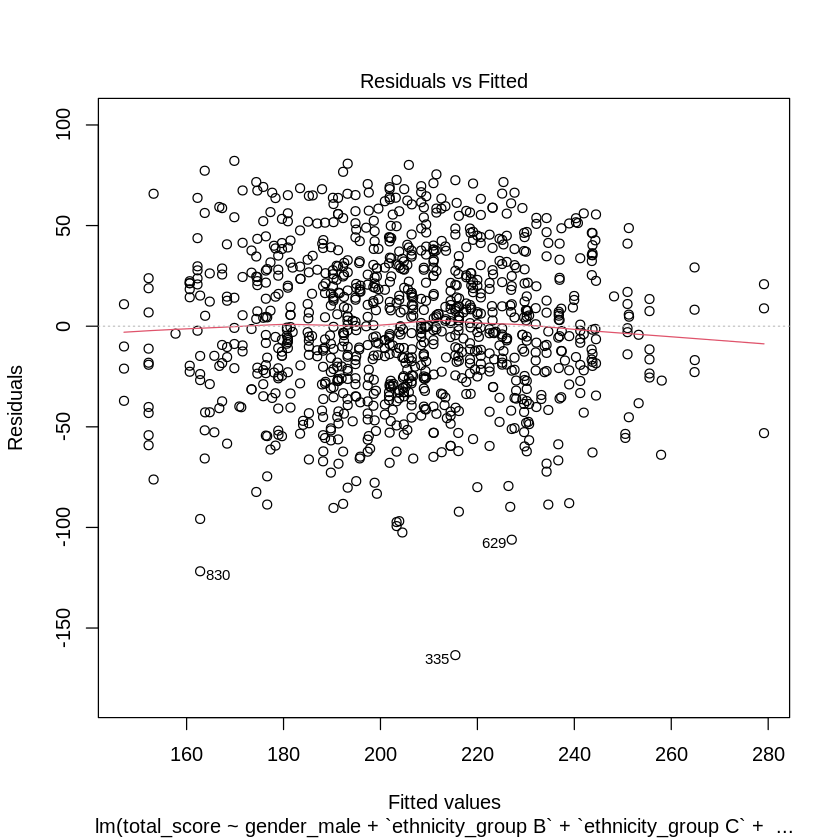

[1] "Histograms saved successfully and regression assumptions checked!"


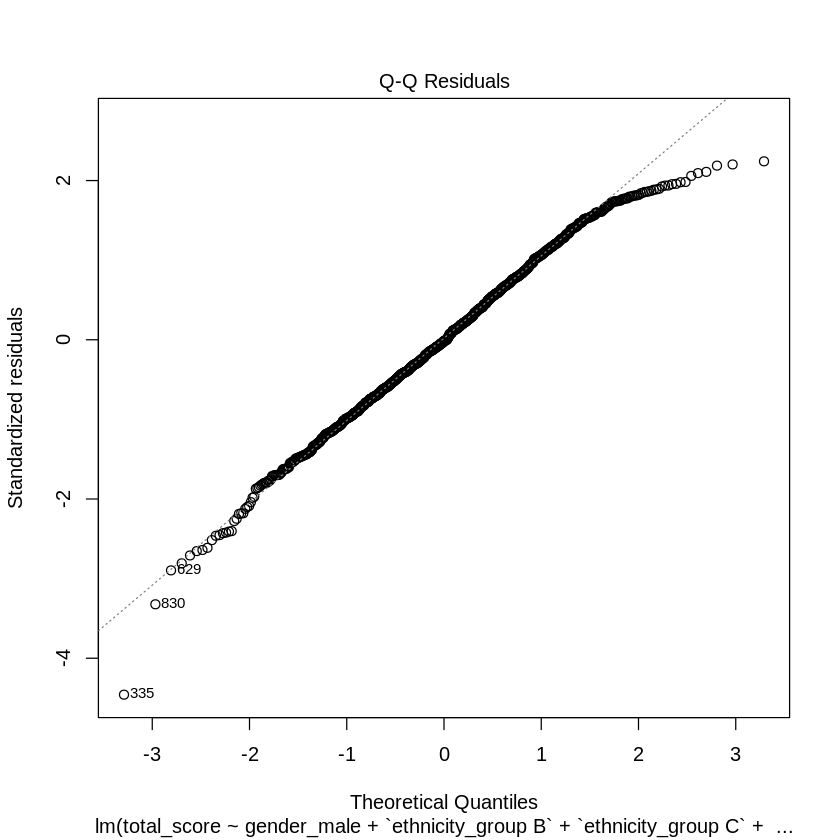

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr)
library(fastDummies)

# Define the URL for the dataset
url <- "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"

# Read the data from the URL
data <- read_csv(url)

# Check for missing values
missing_values <- sum(is.na(data))
print(paste("Number of missing values:", missing_values))

# Remove rows with any null (missing) values
clean_data <- na.omit(data)

# Create a new column for total score
clean_data <- mutate(clean_data, total_score = math_score + reading_score + writing_score)

# Dummy code categorical columns using fastDummies
df_total <- dummy_cols(clean_data,
                       select_columns = c('gender', 'ethnicity', 'parental_education', 'lunch', 'preparation_course'),
                       remove_first_dummy = TRUE,
                       remove_selected_columns = TRUE)

# Print column names to check the exact names created
print(names(df_total))

# Perform the linear regression
regression_model <- lm(total_score ~ gender_male + `ethnicity_group B` + `ethnicity_group C` +
                       `ethnicity_group D` + `ethnicity_group E` +
                       `parental_education_bachelor's degree` +
                       `parental_education_high school` +
                       `parental_education_master's degree` +
                       `parental_education_some college` +
                       `parental_education_some high school` +
                       lunch_standard + preparation_course_none,
                       data = df_total)

# Display the summary of the regression model
print(summary(regression_model))

# Create and save histograms for each numeric column

# Histogram for math_score
math_score_plot <- ggplot(clean_data, aes(x = math_score)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Math Scores", x = "Math Score", y = "Frequency") +
  theme_minimal()

ggsave("math_score_histogram.png", plot = math_score_plot)

# Histogram for reading_score
reading_score_plot <- ggplot(clean_data, aes(x = reading_score)) +
  geom_histogram(binwidth = 5, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Reading Scores", x = "Reading Score", y = "Frequency") +
  theme_minimal()

ggsave("reading_score_histogram.png", plot = reading_score_plot)

# Histogram for writing_score
writing_score_plot <- ggplot(clean_data, aes(x = writing_score)) +
  geom_histogram(binwidth = 5, fill = "red", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Writing Scores", x = "Writing Score", y = "Frequency") +
  theme_minimal()

ggsave("writing_score_histogram.png", plot = writing_score_plot)

# Check assumptions of the regression model

# 1. Linearity: Residuals vs Fitted plot
plot(regression_model, 1)

# 2. Normality: Q-Q plot
plot(regression_model, 2)

# Print completion message
print("Histograms saved successfully and regression assumptions checked!")


# Exploring the data
---

In the previous exercises, we only looked at the effect on `total score`. Now that we know that some of our variables did significantly predict student exam scores let's explore it in more detail.

### Exercise 10
---

* Run a regression called `write_mod` using `writing_score` as the DV
* Run a regression called `read_mod` using `reading_score` as the DV
* Run a regression called `math_mod` using `math_score` as the DV
* Compare the results with the model from exercise 7 and comment your findings
* Compare the results of each model with each other. What inferences can you
make?
* Look at the difference in coefficents of significant variables between models - what does it tell you?


Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, ethnicity, parental_education, lunch, preparation_course
dbl (3): math_score, reading_score, writing_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Number of missing values: 0"
[1] "Column names in the dataset with dummy variables:"
 [1] "gender"                              
 [2] "ethnicity"                           
 [3] "parental_education"                  
 [4] "lunch"                               
 [5] "preparation_course"                  
 [6] "math_score"                          
 [7] "reading_score"                       
 [8] "writing_score"                       
 [9] "total_score"                         
[10] "gender_male"                         
[11] "ethnicity_group B"                   
[12] "ethnicity_group C"                   
[13] "ethnicity_group D"                   
[14] "ethnicity_group E"                   
[15] "parental_education_bachelor's degree"
[16] "parental_education_high school"      
[17] "parental_education_master's degree"  
[18] "parental_education_some college"     
[19] "parental_education_some high school" 
[20] "lunch_standard"                      
[21] "preparation_course_none"

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


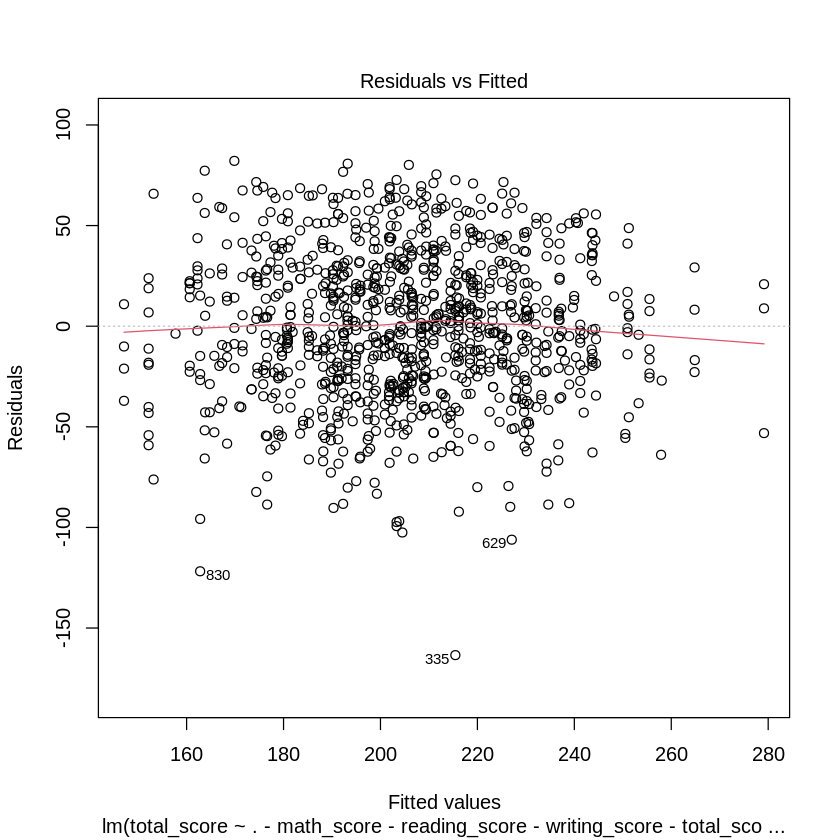

[1] "Comparison of Coefficients:"
                                                               Variable
(Intercept)                                                 (Intercept)
gendermale                                                   gendermale
ethnicitygroup B                                       ethnicitygroup B
ethnicitygroup C                                       ethnicitygroup C
ethnicitygroup D                                       ethnicitygroup D
ethnicitygroup E                                       ethnicitygroup E
parental_educationbachelor's degree parental_educationbachelor's degree
parental_educationhigh school             parental_educationhigh school
parental_educationmaster's degree     parental_educationmaster's degree
parental_educationsome college           parental_educationsome college
parental_educationsome high school   parental_educationsome high school
lunchstandard                                             lunchstandard
preparation_coursenone        

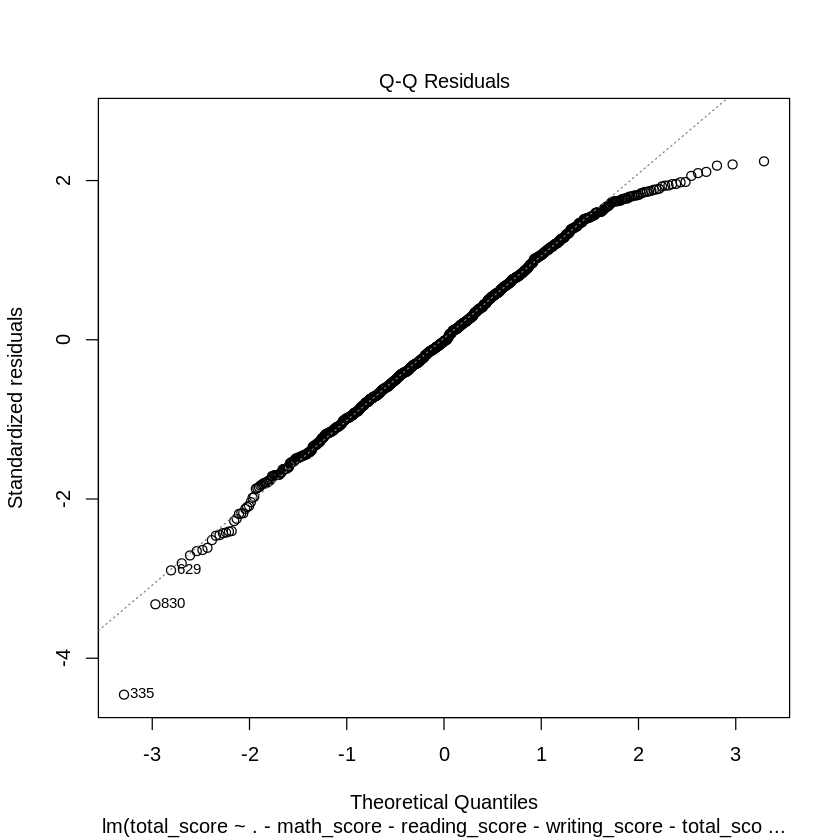

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr)
library(fastDummies)

# Define the URL for the dataset
url <- "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"

# Read the data from the URL
data <- read_csv(url)

# Check for missing values
missing_values <- sum(is.na(data))
print(paste("Number of missing values:", missing_values))

# Remove rows with any null (missing) values
clean_data <- na.omit(data)

# Create a new column for total score
clean_data <- mutate(clean_data, total_score = math_score + reading_score + writing_score)

# Convert categorical variables to dummy variables
df_total <- dummy_cols(clean_data,
                       select_columns = c('gender', 'ethnicity', 'parental_education', 'lunch', 'preparation_course'),
                       remove_first_dummy = TRUE)

# Ensure the exact dummy variable names
print("Column names in the dataset with dummy variables:")
print(names(df_total))

# Perform the linear regression for total_score
regression_model <- lm(total_score ~ . - math_score - reading_score - writing_score - total_score,
                       data = df_total)
print(summary(regression_model))

# Create and save histograms for each numeric column
# Histogram for math_score
p_math <- ggplot(clean_data, aes(x = math_score)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Math Scores", x = "Math Score", y = "Frequency") +
  theme_minimal()
ggsave("math_score_histogram.png", plot = p_math)

# Histogram for reading_score
p_reading <- ggplot(clean_data, aes(x = reading_score)) +
  geom_histogram(binwidth = 5, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Reading Scores", x = "Reading Score", y = "Frequency") +
  theme_minimal()
ggsave("reading_score_histogram.png", plot = p_reading)

# Histogram for writing_score
p_writing <- ggplot(clean_data, aes(x = writing_score)) +
  geom_histogram(binwidth = 5, fill = "red", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Writing Scores", x = "Writing Score", y = "Frequency") +
  theme_minimal()
ggsave("writing_score_histogram.png", plot = p_writing)

# Check assumptions of the regression model
# 1. Linearity: Residuals vs Fitted plot
plot(regression_model, 1)

# 2. Normality: Q-Q plot
plot(regression_model, 2)

# Perform regression models for individual scores
write_mod <- lm(writing_score ~ . - math_score - reading_score - writing_score - total_score, data = df_total)
read_mod <- lm(reading_score ~ . - math_score - reading_score - writing_score - total_score, data = df_total)
math_mod <- lm(math_score ~ . - math_score - reading_score - writing_score - total_score, data = df_total)

# Extract coefficients from each model
write_mod_summary <- summary(write_mod)
read_mod_summary <- summary(read_mod)
math_mod_summary <- summary(math_mod)

# Create a unified list of variable names
variables <- union(union(rownames(write_mod_summary$coefficients),
                         rownames(read_mod_summary$coefficients)),
                   rownames(math_mod_summary$coefficients))

# Extract coefficients for each variable and handle missing variables
write_mod_coefs <- setNames(as.numeric(write_mod_summary$coefficients[variables, "Estimate"]), variables)
read_mod_coefs <- setNames(as.numeric(read_mod_summary$coefficients[variables, "Estimate"]), variables)
math_mod_coefs <- setNames(as.numeric(math_mod_summary$coefficients[variables, "Estimate"]), variables)

# Create a data frame for comparison
coefficients_compare <- data.frame(
  Variable = variables,
  Writing_Score = write_mod_coefs,
  Reading_Score = read_mod_coefs,
  Math_Score = math_mod_coefs
)

print("Comparison of Coefficients:")
print(coefficients_compare)

# Compare R-squared values
r_squared_values <- data.frame(
  Model = c("Writing Score Model", "Reading Score Model", "Math Score Model"),
  R_squared = c(write_mod_summary$r.squared, read_mod_summary$r.squared, math_mod_summary$r.squared)
)

print("R-squared Values Comparison:")
print(r_squared_values)


# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: